In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold,train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import f1_score,precision_score, confusion_matrix, accuracy_score,recall_score,classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import files
uploaded= files.upload()

Saving Fraud_check.csv to Fraud_check (2).csv


In [3]:
fraud= pd.read_csv("Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
fraud.duplicated().sum()

0

In [7]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
fraud1= fraud.copy()
list=[]
for i in range(0,len(fraud)):
  if fraud['Taxable.Income'][i]<=30000:
    list.append('Risky')
  elif fraud["Taxable.Income"][i]>30000:
    list.append('Good')

fraud1['Type']=list
fraud1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [9]:
fraud1['Type'].value_counts()

Type
Good     476
Risky    124
Name: count, dtype: int64

<Axes: xlabel='Taxable.Income', ylabel='Density'>

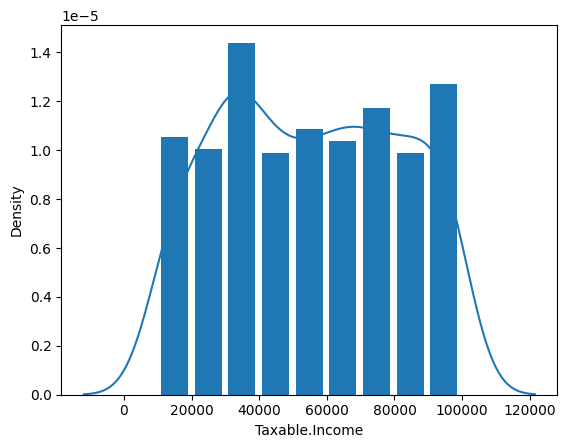

In [10]:
sns.distplot(fraud1['Taxable.Income'],hist_kws={"rwidth":0.80,"alpha":1.0})

In [11]:
fraud1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Type             600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


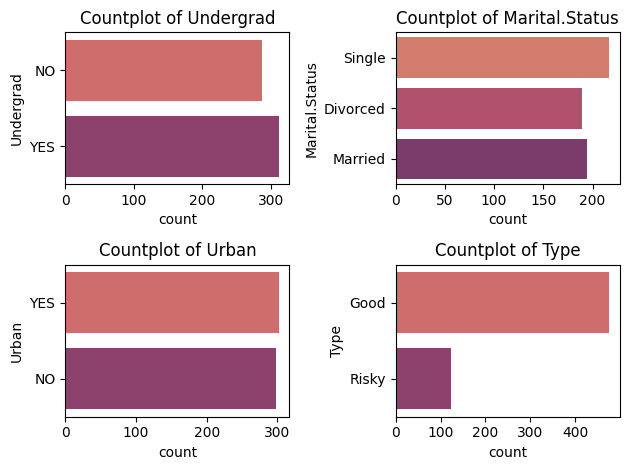

In [12]:
column=["Undergrad","Marital.Status","Urban","Type"]
for i,j in enumerate(column,start=1):
  plt.subplot(2,2,i)
  sns.countplot(fraud1[j],palette= 'flare')
  plt.title(f"Countplot of {j}")
  plt.tight_layout()

plt.show()

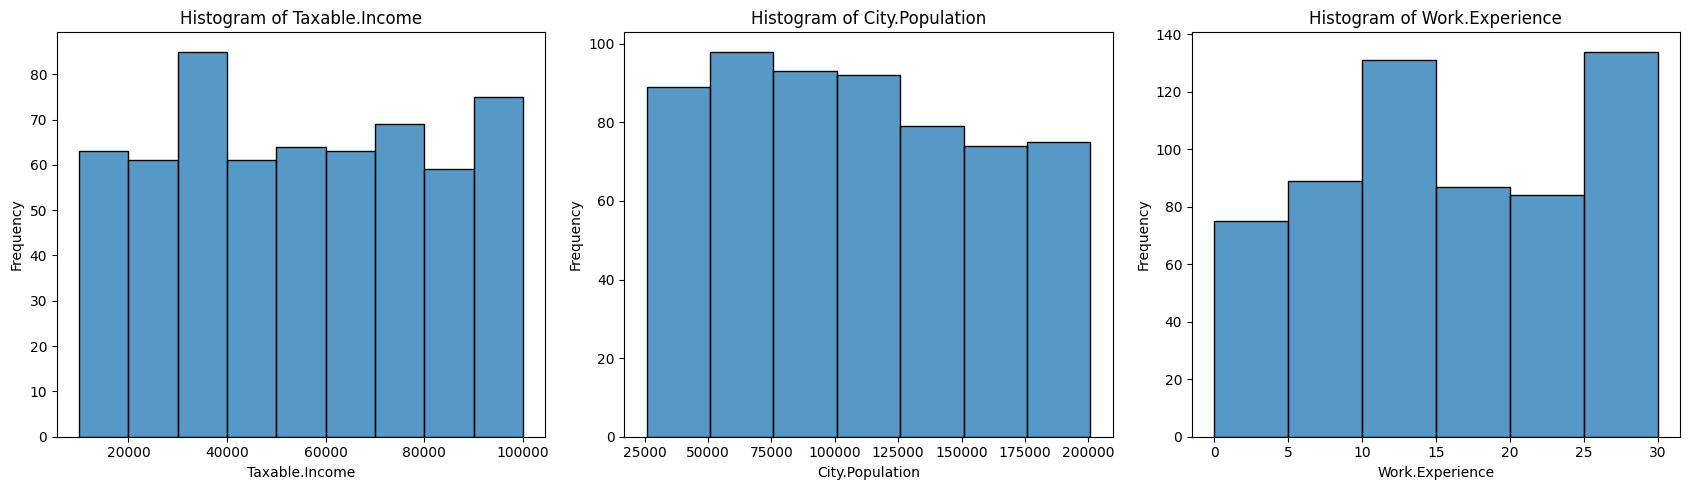

In [13]:
colnames=['Taxable.Income', 'City.Population', 'Work.Experience']
bin_widths = [10000, 25000, 5]
plt.figure(figsize=(17, 5))
for index, colname,bin_width in zip(range(1,len(colnames)+1),colnames,bin_widths):
  plt.subplot(1,3,index)
  sns.histplot(fraud1[colname], bins=range(min(fraud1[colname]),max(fraud1[colname])+bin_width,bin_width))
  plt.title(f'Histogram of {colname}')
  plt.xlabel(colname)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

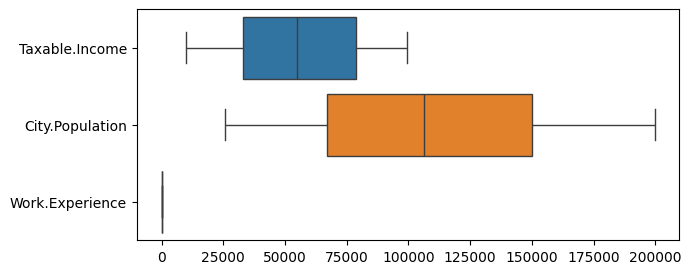

In [14]:
plt.figure(figsize=(7,3))
sns.boxplot(data= fraud[colnames], orient="h")
plt.show()

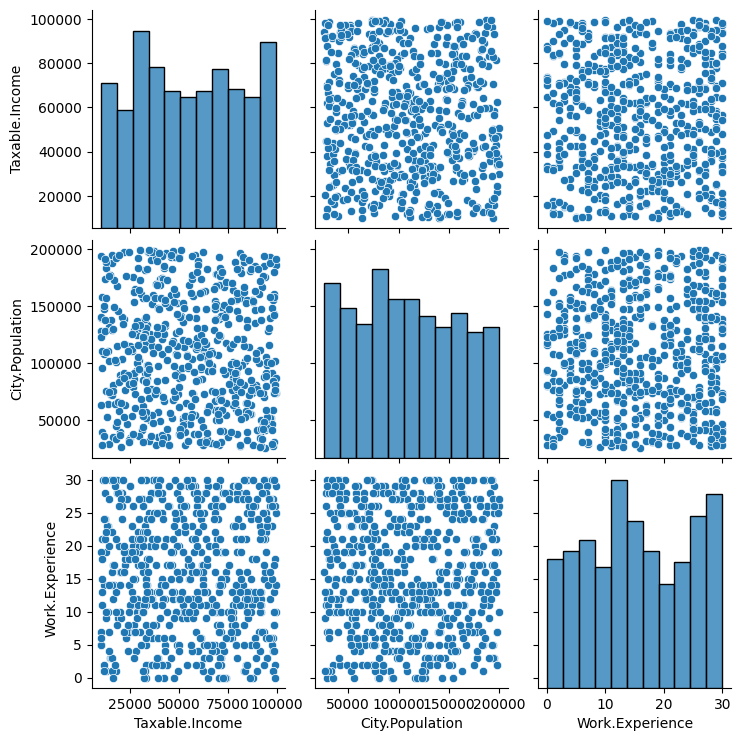

In [15]:
sns.pairplot(fraud1,palette='coolwarm')

In [16]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


<Figure size 800x500 with 0 Axes>

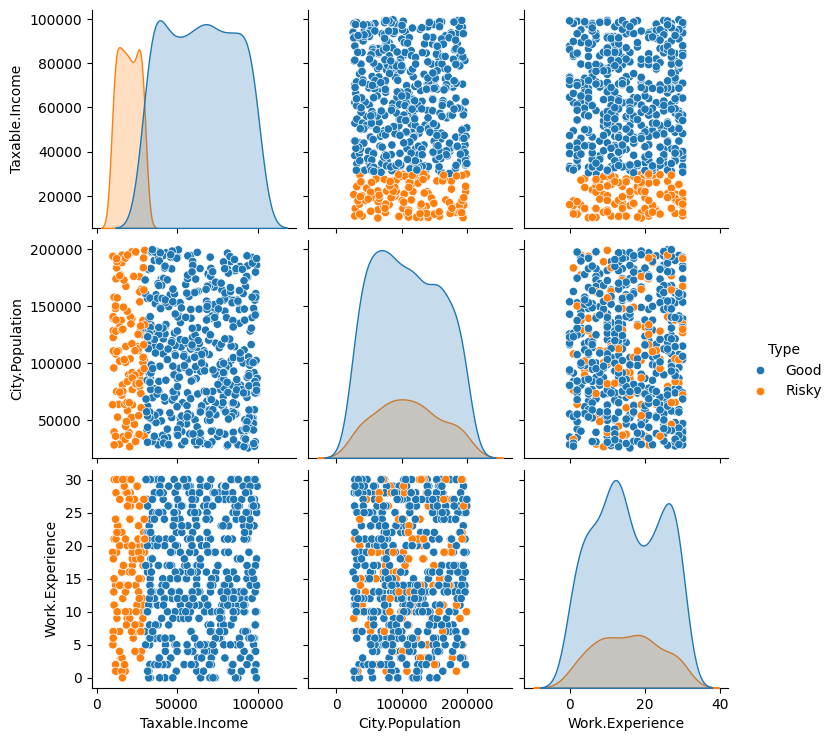

In [17]:
plt.figure(figsize=(8,5))
sns.pairplot(data= fraud1, hue = 'Type')
plt.show()

In [18]:
fraud2= fraud1.copy()
fraud2= fraud2.rename(columns={'Marital.Status':'martial_status','Taxable.Income':"taxable_income","City.Population":"city_population",'Work.Experience':"work_experience"})
fraud2.drop('taxable_income',axis=1,inplace= True)

In [19]:
fraud2.head()

,Undergrad,martial_status,city_population,work_experience,Urban,Type
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [20]:
fraud_dummy= fraud2.copy()
fraud_dummy= pd.get_dummies(fraud_dummy.iloc[:,:-1])
fraud_dummy.head()

,city_population,work_experience,Undergrad_NO,Undergrad_YES,martial_status_Divorced,martial_status_Married,martial_status_Single,Urban_NO,Urban_YES
0,50047,10,True,False,False,False,True,False,True
1,134075,18,False,True,True,False,False,False,True
2,160205,30,True,False,False,True,False,False,True
3,193264,15,False,True,False,False,True,False,True
4,27533,28,True,False,False,True,False,True,False


In [21]:
fraud_dummy= fraud_dummy.astype(int)
fraud_dummy.head()

,city_population,work_experience,Undergrad_NO,Undergrad_YES,martial_status_Divorced,martial_status_Married,martial_status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


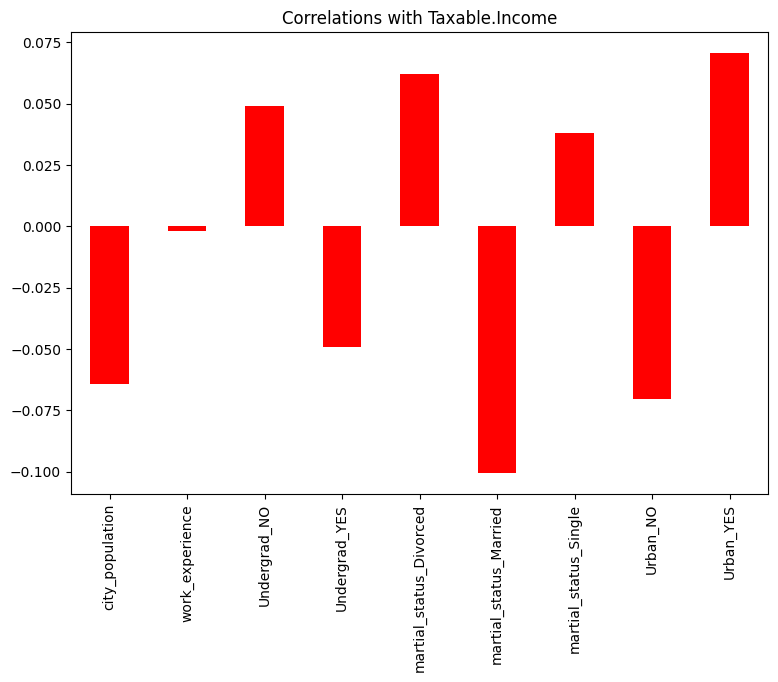

In [22]:
fraud_corr= fraud_dummy.copy()
correlations= fraud_corr.corrwith(fraud['Taxable.Income'])
correlations= correlations[correlations!=1]
positive_corr= correlations[correlations>0].sort_values(ascending=False)
negative_corr=correlations[correlations<0].sort_values(ascending=False)
correlations.plot.bar(figsize=(9,6),color='red')
plt.title('Correlations with Taxable.Income')
plt.show()

In [23]:
fraud1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Type'],
      dtype='object')

In [24]:
column

['Undergrad', 'Marital.Status', 'Urban', 'Type']

In [25]:
fraud1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [26]:
fraud3= fraud1.copy()
fraud3.drop("Taxable.Income",axis=1,inplace= True)
fraud3= pd.get_dummies(fraud3.iloc[:,:-1])
fraud3= fraud3.astype(int)
fraud3.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [27]:
fraud3['Type']=fraud2['Type']
fraud3.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Type
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good


In [28]:
le=LabelEncoder()
le.fit(fraud3['Type'])
fraud3['Type']= le.transform(fraud3['Type'])
fraud3.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Type
0,50047,10,1,0,0,0,1,0,1,0
1,134075,18,0,1,1,0,0,0,1,0
2,160205,30,1,0,0,1,0,0,1,0
3,193264,15,0,1,0,0,1,0,1,0
4,27533,28,1,0,0,1,0,1,0,0


In [29]:
x= fraud3.iloc[:,:-1]
y= fraud3.Type

**Feature** **extraction**

In [30]:
test= SelectKBest(score_func=chi2,k=4)
fit= test.fit(x, y)

In [31]:
scores= fit.scores_
features= fit.transform(x)

In [32]:
fraud_score= pd.DataFrame(zip(x.columns,scores),columns=['Features',"Score"])
fraud_score.sort_values(by='Score',ascending=False,inplace=True)
print(fraud_score)

                  Features        Score
0          City.Population  2045.643886
5   Marital.Status_Married     0.756912
4  Marital.Status_Divorced     0.302172
6    Marital.Status_Single     0.095850
2             Undergrad_NO     0.048929
3            Undergrad_YES     0.045165
1          Work.Experience     0.011709
7                 Urban_NO     0.007044
8                Urban_YES     0.006951


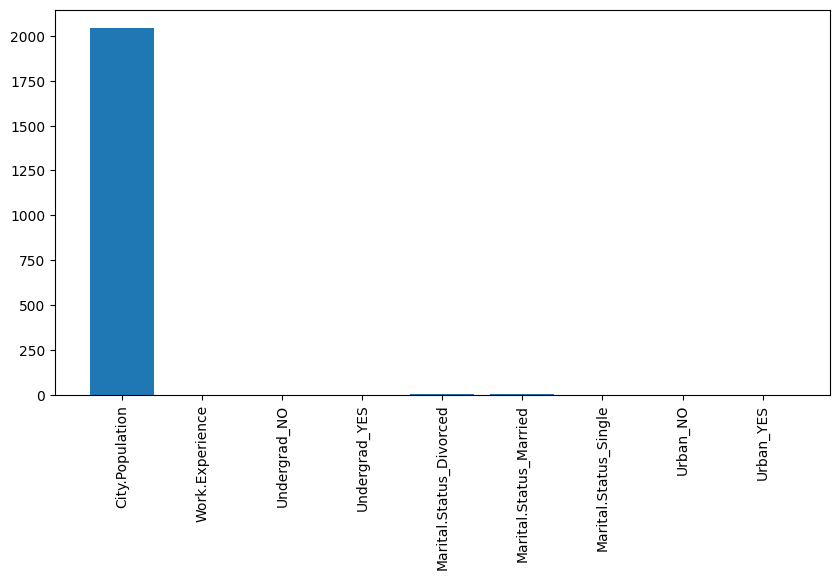

In [33]:
fig, axes = plt.subplots(figsize=(10,5))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 10)
plt.show()

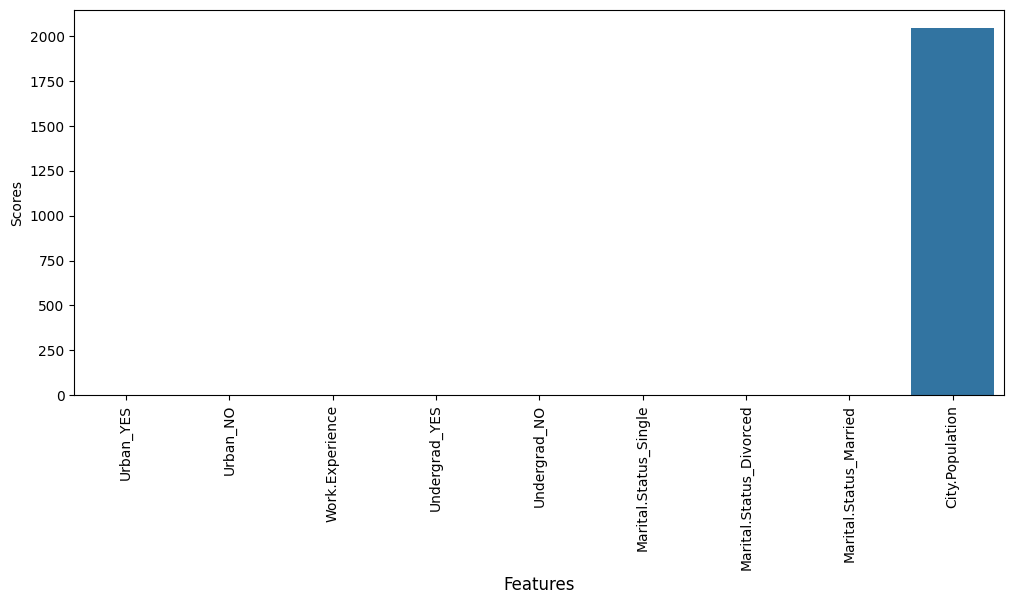

In [34]:
plt.figure(figsize=(12,5))
sns.barplot(x='Features', y="Score", data=fraud_score, order=fraud_score.sort_values('Score').Features)
plt.xlabel("Features", size=12)
plt.ylabel("Scores", size=10)
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

In [35]:
fraud2.head(2)

,Undergrad,martial_status,city_population,work_experience,Urban,Type
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good


In [36]:
cat_column=["Undergrad","martial_status","Urban","Type"]

In [37]:
le= LabelEncoder()
for col in cat_column:
  fraud2[col]= le.fit_transform(fraud2[col])

fraud2.head(2)

,Undergrad,martial_status,city_population,work_experience,Urban,Type
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0


In [38]:
x= fraud2.drop('Type',axis=1)
y=fraud2['Type']

In [39]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [40]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of x_train :  (420, 5)
Shape of x_test  :  (180, 5)
Shape of y_train :  (420,)
Shape of y_test  :  (180,)


In [41]:
score=[]
for i in range(1,200):
  model= RandomForestClassifier(n_estimators=i,random_state=42)
  model.fit(x_train,y_train)
  score.append(model.score(x_test,y_test))

In [42]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [43]:
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV (estimator=rf_clf, scoring='f1',param_distributions=random_grid,
                            n_iter=100, cv=3,verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 28, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False})
Train Result:
Accuracy Score: 100.00%
__________________________________________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    333.0  87.0       1.0      420.0         420.0
__________________________________________________________________________
Confusion Matrix: 
 [[333   0]
 [  0  87]]

Test Result:
Accuracy Score: 70.00%
__________________________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.783439   0.130435       0.7 

In [44]:
rf_best= rf_cv.best_estimator_
rf_best

RandomForestClassifier(bootstrap=False, max_depth=60, max_features='auto',
                       n_estimators=28, random_state=42)

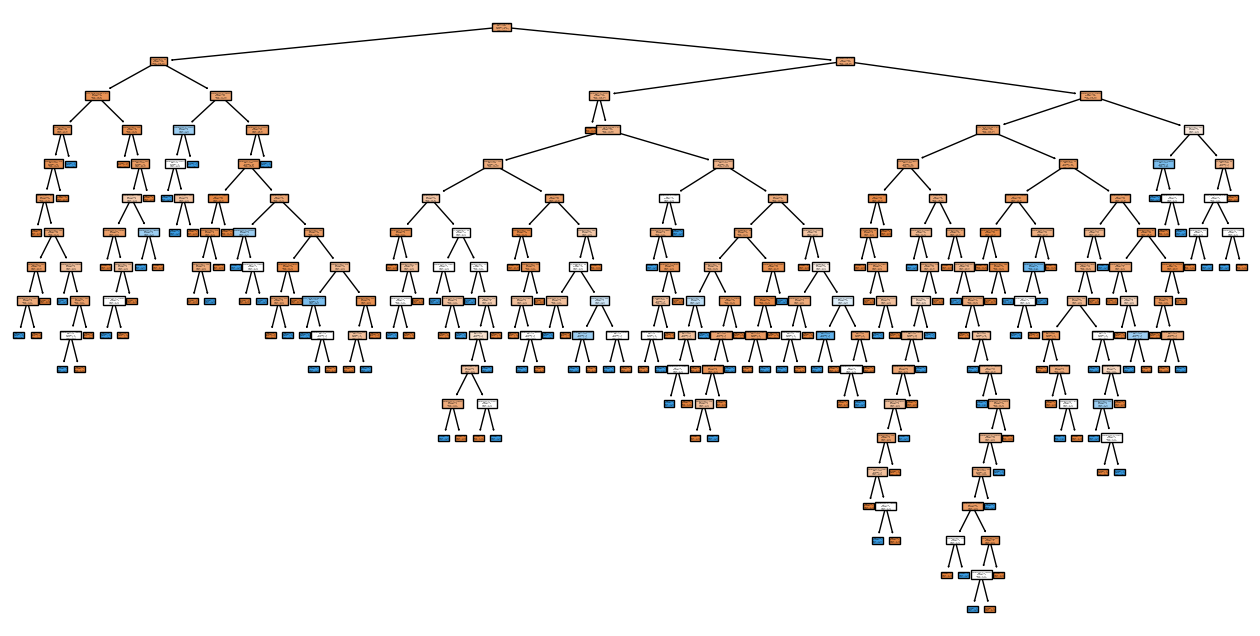

In [47]:
plt.figure(figsize=(16,8))
plot_tree(rf_best.estimators_[27], feature_names = fraud_dummy.columns,class_names=fraud1['Type'].unique(),filled=True)
plt.show()